In [2]:
import os
import dmd
os.environ["OMP_NUM_THREADS"]='8'
import matplotlib.pyplot as plt
import numpy as np
import timeit
from scipy.interpolate import griddata
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

In [87]:
# N=10000
# K=2
# seed=1
# c=1
# t1=100
# dt=1E-2
# atol=1E-10
# fs=np.zeros(N+2)
# ns=[0,1,-1]
# omega=np.zeros(N)

# filebase='data/dmd1'
# # loadstr=''
# loadstr='module load cuda &&'
# os.system('mkdir -p %s'%(filebase))

# for n in np.arange(len(ns)):
#     os.system('rm %s/%i*'%(filebase,n))
#     fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
#     fs[-2]=-1E-14
#     fs[-1]=dt
#     fs.tofile('%s/%ifs.dat'%(filebase,n))
#     os.system('bash -c "%s ./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 0 -D 1 -nvR %s/%i"'%(loadstr,N,K,c,t1,dt,seed,atol,filebase,n))
#     omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

# K=2
# c=1.75
# filebase='data/dmd2'
# os.system('mkdir -p %s'%(filebase))
# for n in np.arange(len(ns)):
#     os.system('rm %s/%i*'%(filebase,n))
#     fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
#     fs[-2]=-1E-14
#     fs[-1]=dt
#     fs.tofile('%s/%ifs.dat'%(filebase,n))
#     os.system('bash -c "%s ./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 0 -D 1 -nvR %s/%i"'%(loadstr,N,K,c,t1,dt,seed,atol,filebase,n))
#     omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

# K=N
# c=1.75
# filebase='data/dmd3'
# os.system('mkdir -p %s'%(filebase))
# for n in np.arange(len(ns)):
#     os.system('rm %s/%i*'%(filebase,n))
#     fs[np.argsort(-omega)]=ns[n]*(2*np.pi*np.arange(N)/N-np.pi)
#     fs[-2]=-1E-14
#     fs[-1]=dt
#     fs.tofile('%s/%ifs.dat'%(filebase,n))
#     os.system('bash -c "%s ./kuramoto_64 -N %i -K %i -c %f -t %f -d %f -s %i -a %e -g 0 -D 1 -nvR %s/%i"'%(loadstr,N,K,c,t1,dt,seed,atol,filebase,n))
#     omega=np.fromfile('%s/0frequencies.dat'%(filebase),dtype=np.float64)

### Input trajectories

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2787470/860985213.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega_i$')


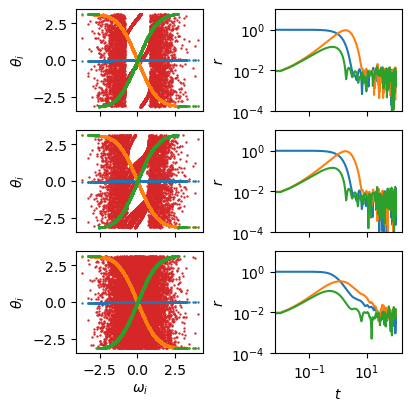

In [4]:
filebases=['data/dmd/10000/2','data/dmd/10000/6','data/dmd/10000/10000']
fig,axs=plt.subplots(3,2,figsize=(4,4) ,constrained_layout=True)

numtraj=3

for m in range(len(filebases)):
    for n in range(numtraj):
        filebase='%s/%i'%(filebases[m],n)
        file=open(filebase+'.out')
        lines=file.readlines()
        N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
        N=int(N)
        K=int(K)
        file.close()

    
        omega=np.fromfile(filebase+'frequencies.dat',dtype=np.float64)
        N=len(omega)
        thetas=np.fromfile(filebase+'thetas.dat',dtype=np.float64).reshape((-1,N))
        thetas=thetas-np.mean(omega)*dt*np.arange(thetas.shape[0])[:,np.newaxis]
        orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
    
        plt.subplot(3,2,2+2*m)
        plt.plot(np.arange(len(orders))*dt,orders,c=colors[n],zorder=-5)
        plt.gca().set_rasterization_zorder(0)
        plt.xscale('log')
        plt.yscale('log')
        plt.ylabel('$r$')
        plt.ylim(1E-4,1E1)
        if m<2:
            plt.gca().set_xticklabels([])
        else:
            plt.xlabel('$t$')

        
        plt.subplot(3,2,1+2*m)
        plt.scatter(omega,np.mod(thetas[0]+np.pi,2*np.pi)-np.pi,s=0.5,zorder=-5)
        plt.gca().set_rasterization_zorder(0)
        plt.ylabel(r'$\theta_i$')
        
        if m<2:
            plt.gca().set_xticklabels([])
        else:
            plt.xlabel('$\omega_i$')
    plt.subplot(3,2,1+2*m)
    plt.scatter(omega,np.mod(thetas[-1]+np.pi,2*np.pi)-np.pi,s=0.5,zorder=-6)        
    

# plt.savefig('oscillatordmd1.pdf',dpi=200)
plt.show()

### Mode amplitudes decay exponentially, and order parameter DMD reconstruction is good 

In [5]:
# filebases=['data/dmd1/','data/dmd2/','data/dmd3/']
# resmin=1E-5
# resmax=1E-10
# rescrit=1E-7
# # for D in ['0','1','2','3','4','5']:
# for D in ['0','1']:
#     for filebase0 in filebases:
#         phis=np.load('%s%sphis.npy'%(filebase0,D))
#         phitildes=np.load('%s%sphitildes.npy'%(filebase0,D))
#         bs=np.load('%s%sbs.npy'%(filebase0,D))
#         evals=np.load('%s%sevals.npy'%(filebase0,D))
#         res=np.load('%s%sres.npy'%(filebase0,D))
#         lengths=np.load('%s%slengths.npy'%(filebase0,D))
#         Ndict=phis.shape[0]
#         inds=np.where(res<rescrit)[0]
#         X_reconstruct=np.zeros((bs.shape[0],2*N))
#         for n in range(numtraj):
#             print(filebase0,D,n,end='\r')
#             cos_reconstruct=np.real((bs[n,inds]*phitildes[inds,:N].T).dot(evals[inds,np.newaxis]**np.arange(lengths[n]-1)[np.newaxis,:])).T
#             sin_reconstruct=np.real((bs[n,inds]*phitildes[inds,Ndict//2:Ndict//2+N].T).dot(evals[inds,np.newaxis]**np.arange(lengths[n]-1)[np.newaxis,:])).T
#             order=np.abs(np.mean(cos_reconstruct+1j*sin_reconstruct,axis=1))
#             np.save('%s%iorder_%s.npy'%(filebase0,n,D),order)

In [6]:
# filebases=['data/dmd1/','data/dmd2/','data/dmd3/']
# resmin=1E-5
# resmax=1E-10
# rescrit=1E-7
# # for D in ['0','1','2','3','4','5']:
# for D in ['0','1']:
#     fig,axs=plt.subplots(3,3,figsize=(8,6),layout='constrained')
#     M=int(D[0])
#     if M==0:
#         fig.suptitle('N=%i D=%i'%(N,N*2))
#     else:
#         fig.suptitle('N=%i D=%i'%(N,N*2*M+N/2*4*M))

#     for m in range(len(filebases)):
#         filebase0=filebases[m]
#         bs=np.load('%s/%sbs.npy'%(filebase0,D))
#         evals=np.load('%s/%sevals.npy'%(filebase0,D))
#         res=np.load('%s/%sres.npy'%(filebase0,D))
#         lengths=np.load('%s/%slengths.npy'%(filebase0,D))
#         inds=np.where(res<rescrit)[0]
#         for n in range(numtraj):
#             plt.subplot(3,3,m+1)
#             # inds2=np.argsort(np.abs(bs[n0s[n],inds]))
#             # plt.plot(np.arange(lengths[n])*dt,np.abs(bs[n,inds[inds2[:]]]),c=colors[n],lw=0.5,alpha=0.2)
#             plt.ylim(1E-3,1E-1)
#             plt.yscale('log')
#             # plt.xscale('log')
#             plt.ylim(1E-3,1E-1)
# #             plt.xlim(0,50)
#             plt.gca().set_xticklabels('')
    
#             if m==0:
#                 plt.ylabel('$b_i^j$')
#             else:
#                 plt.gca().set_yticklabels('')
#             plt.gca().set_xticklabels('')
                    
#             plt.subplot(3,3,m+4)
#             filebase='%s/%i'%(filebases[m],n)
#             orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
#             rorders=np.load(filebase+'order_%s.npy'%(D))
#             plt.plot(np.arange(lengths[n]-1)*dt,rorders,c=colors[n],ls='--',zorder=-5,lw=0.5)
#             plt.plot(np.arange(lengths[n]-1)*dt,orders[:-1],c=colors[n],zorder=-5,lw=0.5)
#             plt.gca().set_rasterization_zorder(0)
#             # plt.xscale('log')
#             plt.yscale('log')
#             plt.ylim(1E-4,1E1)
# #             plt.xlim(0,50)
#             if m==0:
#                 plt.ylabel('$\hat{r}^j$')
#             else:
#                 plt.gca().set_yticklabels('')
#             plt.gca().set_xticklabels('')
                
#             plt.subplot(3,3,m+7)
#             err=np.abs(rorders-orders[:-1])/orders[:-1]
#             plt.plot(np.arange(lengths[n]-1)*dt,err,c=colors[n],zorder=-5,lw=1,alpha=0.5)
#             plt.gca().set_rasterization_zorder(0)
#             # plt.xscale('log')
#             plt.yscale('log')
#             plt.xlabel('$t$')
#             plt.ylim(1E-6,1E1)
# #             plt.xlim(0,50)
#             if m==0:
#                 plt.ylabel(r'${ | r^j-\hat{r}^j  |}/{ | r^j  |}$')
#             else:
#                 plt.gca().set_yticklabels('')
            


                
#     plt.savefig('oscillatordmd3_%s.pdf'%D)
#     plt.show()

In [7]:
# ds=[]
# es=[]
# for D in ['0','1','2','3','4','5']:
#     M=int(D[0])
#     if M==0:
#         d=N*2
#     else:
#         d=N*2*M+N/2*4*M
        
#     for m in range(len(filebases)):
#         filebase0=filebases[m]
#         for n in range(numtraj):
#             ds=ds+[d]
#             filebase='%s/%i'%(filebases[m],n)
#             orders=np.fromfile(filebase+'order.dat',dtype=np.float64)
#             rorders=np.load(filebase+'order_%s.npy'%(D))
# #             es=es+[np.mean(((orders[:-1]-rorders)/orders[:-1])**2)**0.5]
#             es=es+[np.mean(((orders[:-1]-rorders))**2)**0.5]

In [8]:
# plt.plot(ds[::9],es[::9],marker='o',c=colors[0],ls='-')
# plt.plot(ds[1::9],es[1::9],marker='o',c=colors[1],ls='-')
# plt.plot(ds[2::9],es[2::9],marker='o',c=colors[2],ls='-')
# plt.plot(ds[3::9],es[3::9],marker='o',c=colors[0],ls='--')
# plt.plot(ds[4::9],es[4::9],marker='o',c=colors[1],ls='--')
# plt.plot(ds[5::9],es[5::9],marker='o',c=colors[2],ls='--')
# plt.plot(ds[6::9],es[6::9],marker='o',c=colors[0],ls=':')
# plt.plot(ds[7::9],es[7::9],marker='o',c=colors[1],ls=':')
# plt.plot(ds[8::9],es[8::9],marker='o',c=colors[2],ls=':')
# plt.xlabel(r'$D$')
# plt.ylabel(r'$\varepsilon$')
# plt.yscale('log')
# plt.savefig('errors.pdf')

### DMD spectrum and pseudospectrum

<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_149432/1423415493.py:68: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathrm{Im}({\mu})$')


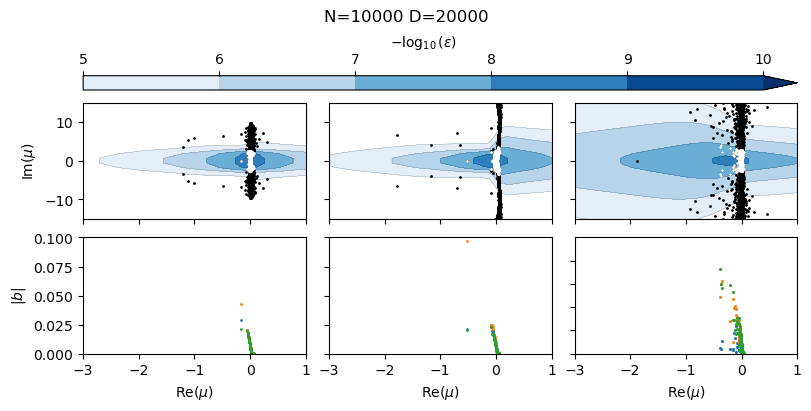

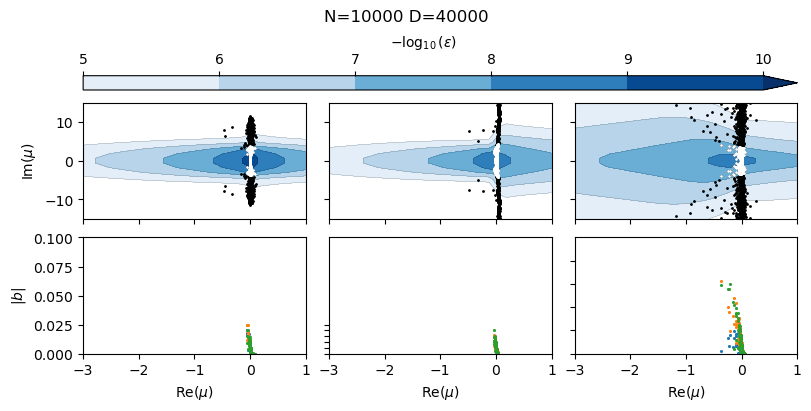

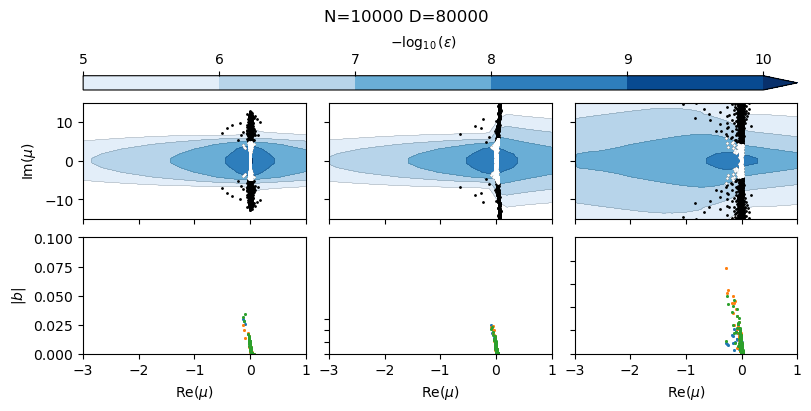

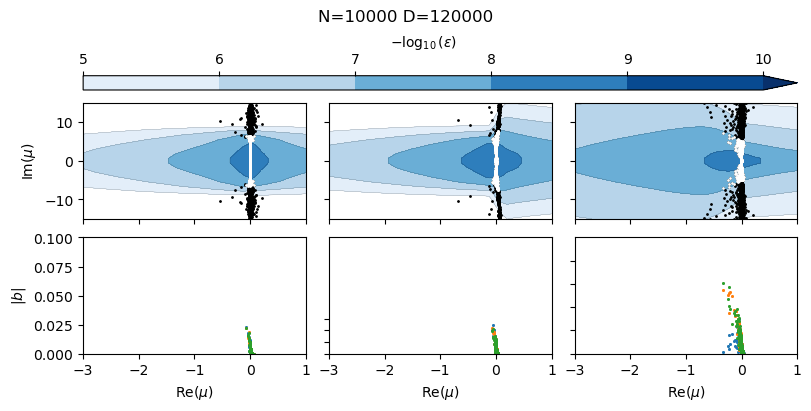

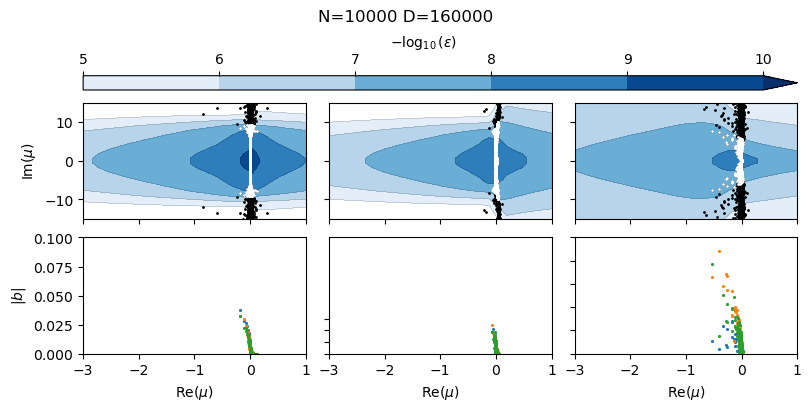

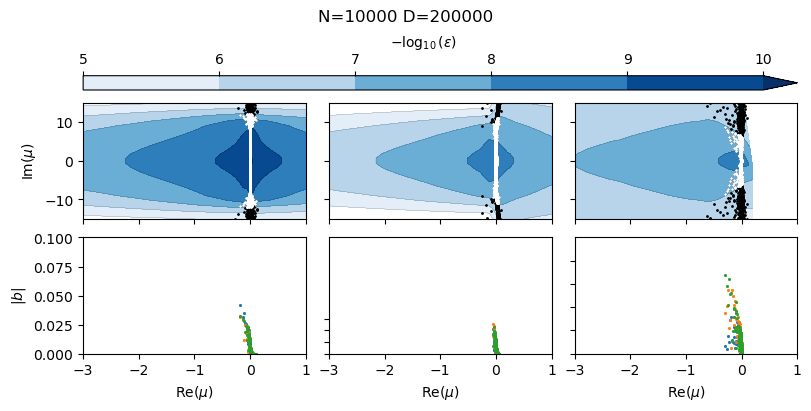

In [4]:
filebases=['data/dmd1/','data/dmd2/','data/dmd3/']
resmin=1E-5
resmax=1E-10
rescrit=1E-7

for D in ['0','1','2','3','4','5']:
    l=0
    fig,axs=plt.subplots(2,3,figsize=(8,4),layout='constrained')
    M=int(D[0])
    
    if M==0:
        fig.suptitle('N=%i D=%i'%(N,N*2))
    else:
        fig.suptitle('N=%i D=%i'%(N,N*2*M+N/2*4*M))
    numtraj=3
    for m in range(len(filebases)):
        filebase0=filebases[m]
        
        bs=np.load(filebase0+str(D)+'bs.npy')
        evals=np.load(filebase0+str(D)+'evals.npy')
        res=np.load(filebase0+str(D)+'res.npy')
        inds=np.where(res<rescrit)[0]
        xs=np.real(np.log(evals)/dt)
        # n0s=np.concatenate([[0],np.cumsum(np.load('%s/%sn0s.npy'%(filebase0,D))-1)])
        
        plt.subplot(2,3,4+l)
    
        # plt.scatter(xs,np.abs(bs[0]),c='grey',s=2)
        for n in range(numtraj):
            plt.scatter(xs[inds],np.abs(bs)[n,inds],c=colors[n],s=1,zorder=-5)
        plt.gca().set_rasterization_zorder(0)
    
        plt.xlabel(r'$\mathrm{Re}(\mu)$')
        plt.xlim(-3,1)
        if l>0:
            plt.gca().set_yticks(plt.gca().get_yticks(),['']*len(plt.gca().get_yticks()))
        else:
            plt.ylabel(r'$|b|$')
        plt.ylim(0,0.1)
    
        pseudo1=np.load('%s/%spseudo.npy'%(filebase0,D))
        zs1=np.load('%s/%szs.npy'%(filebase0,D))
        evals1=np.load('%s/%sevals.npy'%(filebase0,D))
        res1=np.load('%s/%sres.npy'%(filebase0,D))
        nr=26
        ni=26
        
        levels=-np.log(resmin)/np.log(10)+(-np.log(resmax)/np.log(10)+np.log(resmin)/np.log(10))*np.arange(6)/5
    
        plt.subplot(2,3,1+l)
        cs1 = plt.gca().tricontourf(np.real(np.log(zs1)/dt),np.imag(np.log(zs1)/dt),np.log(1/np.array(pseudo1))/np.log(10),levels=levels,cmap='Blues',extend='max',zorder=-5)
        cs2 = plt.gca().tricontour(cs1,levels=levels,colors=('k',),linewidths=0.1,zorder=-5)
    
        plt.gca().set_rasterization_zorder(0)
        plt.xlim(-3,1)
        plt.ylim(-15,15)
        
        xs1=np.real(np.log(evals1)/dt)
        ys1=np.imag(np.log(evals1)/dt)
    
        inds=np.where(res1<rescrit)[0]
        plt.scatter(xs1,ys1,c='black',s=1,zorder=-5)
        plt.scatter(xs1[inds],ys1[inds],c='white',s=1,zorder=-5)
        
        if l>0:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel('$\mathrm{Im}({\mu})$')
        plt.gca().set_xticklabels('')
    
        l=l+1
    
    fig.colorbar(cs1, ax=axs[:,:], location='top',aspect=50,label=r'$-\log_{10}(\varepsilon)$')
    
#     plt.savefig('oscillatordmd2_%s.pdf'%D,dpi=200)
    plt.show()
    

<>:88: SyntaxWarning: invalid escape sequence '\m'
<>:88: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4174519/3656696580.py:88: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathrm{Im}({\mu})$')


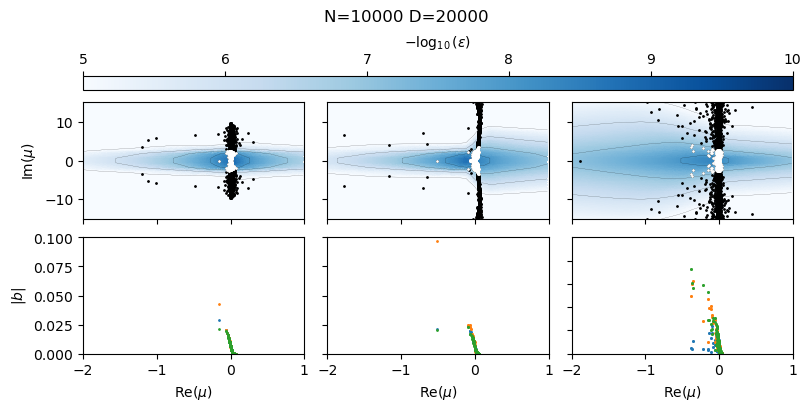

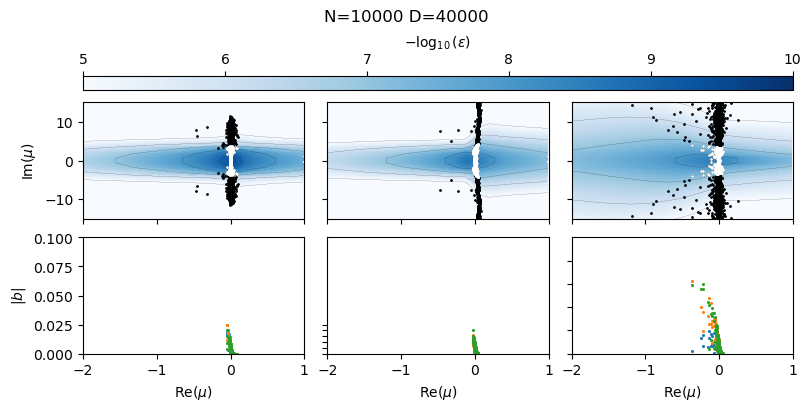

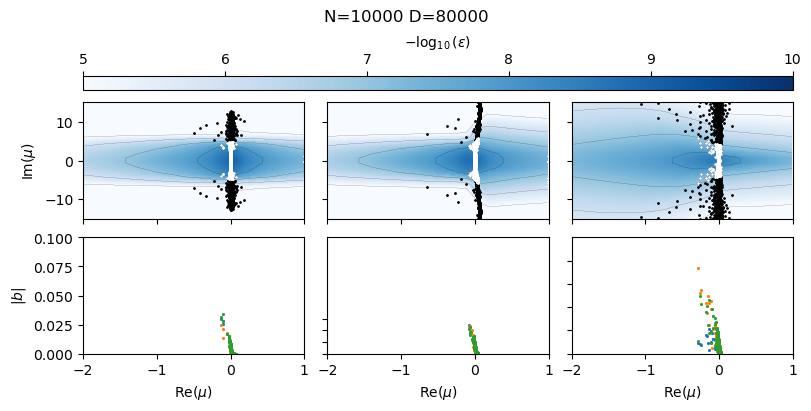

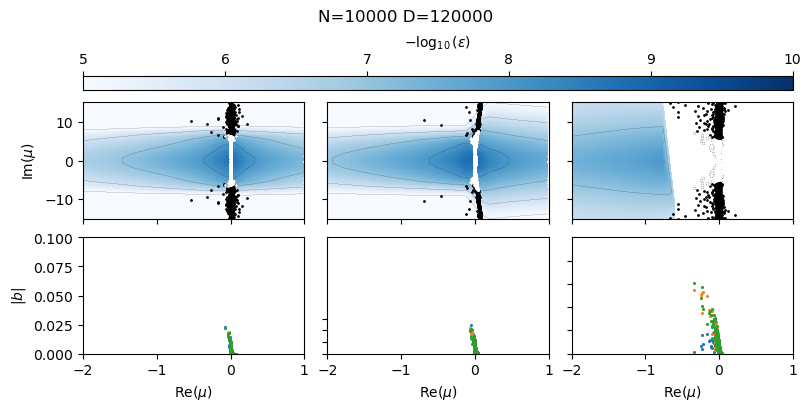

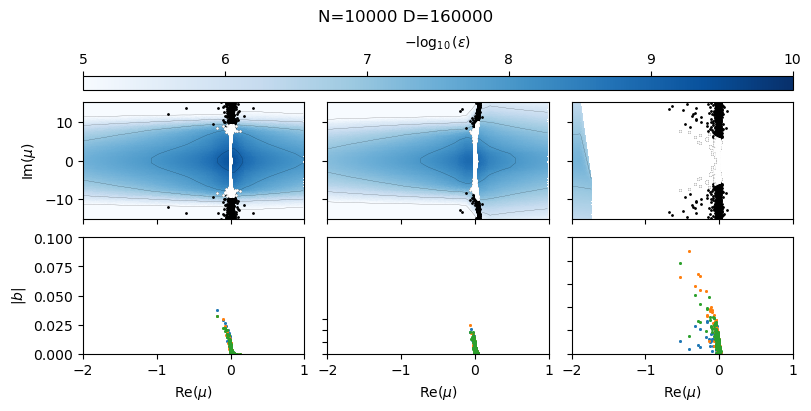

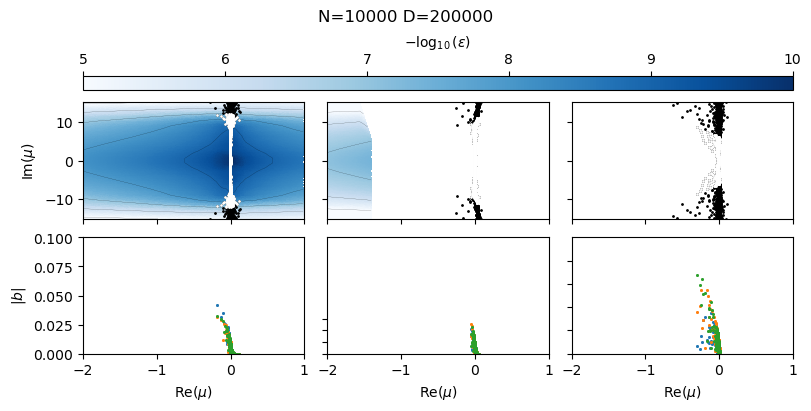

In [31]:
filebases=['data/dmd1/','data/dmd2/','data/dmd3/']
omega=np.fromfile(filebases[0]+'0'+'frequencies.dat',dtype=np.float64)
N=len(omega)

resmin=1E-5
resmax=1E-10
rescrit=1E-7

for D in ['0','1','2','3','4','5']:
    l=0
    M=int(D[0])
    fig,axs=plt.subplots(2,3,figsize=(8,4),layout='constrained')
    if M==0:
        fig.suptitle('N=%i D=%i'%(N,N*2))
    else:
        fig.suptitle('N=%i D=%i'%(N,N*2*M+N/2*4*M))
    numtraj=3
    for m in range(len(filebases)):
        try:
            filebase0=filebases[m]

            bs=np.load(filebase0+str(D)+'bs.npy')
            evals=np.load(filebase0+str(D)+'evals.npy')
            res=np.load(filebase0+str(D)+'res.npy')
            inds=np.where(res<rescrit)[0]
            xs=np.real(np.log(evals)/dt)

            plt.subplot(2,3,4+l)

            # plt.scatter(xs,np.abs(bs[0]),c='grey',s=2)
            for n in range(numtraj):
                plt.scatter(xs[inds],np.abs(bs[n])[inds],c=colors[n],s=1,zorder=-5)
            plt.gca().set_rasterization_zorder(0)

            plt.xlabel(r'$\mathrm{Re}(\mu)$')
            plt.xlim(-2,1)
            if l>0:
                plt.gca().set_yticks(plt.gca().get_yticks(),['']*len(plt.gca().get_yticks()))
            else:
                plt.ylabel(r'$|b|$')
            plt.ylim(0,0.1)

            pseudo1=np.load('%s/%spseudo.npy'%(filebase0,D))
            zs1=np.load('%s/%szs.npy'%(filebase0,D))
            evals1=np.load('%s/%sevals.npy'%(filebase0,D))
            res1=np.load('%s/%sres.npy'%(filebase0,D))
            nr=26
            ni=26

            levels=-np.log(resmin)/np.log(10)+(-np.log(resmax)/np.log(10)+np.log(resmin)/np.log(10))*np.arange(6)/5

            plt.subplot(2,3,1+l)
#             X=np.concatenate([np.real(np.log(zs1)/dt),np.real(np.log(evals1)/dt)])
#             Y=np.concatenate([np.imag(np.log(zs1)/dt),np.imag(np.log(evals1)/dt)])
#             C=np.concatenate([np.log(1/np.array(pseudo1))/np.log(10),np.log(1/np.array(res1))/np.log(10)])
            X=np.real(np.log(zs1)/dt)
            Y=np.imag(np.log(zs1)/dt)
            C=np.log(1/np.array(pseudo1))/np.log(10)

            x=-3+4*np.arange(256)/256
            y=-15+30*np.arange(256)/256
            X2,Y2=np.meshgrid(x,y)
            xi=np.array([X2,Y2]).transpose(1,2,0).reshape(-1,2)
            C2=griddata(np.array([X,Y]).T,C,xi)
            Cinds=np.where(np.isfinite(C2))[0]
            C2=C2[Cinds]
            X2=X2.ravel()[Cinds]
            Y2=Y2.ravel()[Cinds]

            cs2=plt.gca().tripcolor(X2.ravel(),Y2.ravel(),C2,cmap='Blues',zorder=-6,vmin=-np.log(resmin)/np.log(10),vmax=-np.log(resmax)/np.log(10))
            inds=np.where(np.isfinite(C2))[0]
            cs1 = plt.gca().tricontour(X2.ravel()[inds],Y2.ravel()[inds],C2[inds],levels=levels,colors='k',linewidths=0.1,extend='max',zorder=-5)

            plt.gca().set_rasterization_zorder(0)
            plt.xlim(-2,1)
            plt.ylim(-15,15)

            xs1=np.real(np.log(evals1)/dt)
            ys1=np.imag(np.log(evals1)/dt)

            inds=np.where(res1<rescrit)[0]
            plt.scatter(xs1,ys1,c='black',s=1,zorder=-5)
            plt.scatter(xs1[inds],ys1[inds],c='white',s=1,zorder=-5)

            if l>0:
                plt.gca().set_yticklabels([])
            else:
                plt.ylabel('$\mathrm{Im}({\mu})$')
            plt.gca().set_xticklabels('')
        except:
            continue
        l=l+1
    
    fig.colorbar(cs2, ax=axs[:,:], location='top',aspect=50,label=r'$-\log_{10}(\varepsilon)$')
    
    plt.savefig('oscillatordmd2_%s.pdf'%D,dpi=200)
    plt.show()
    

Text(0, 0.5, '$-\\overline{\\mathrm{Re}(\\mu)}$')

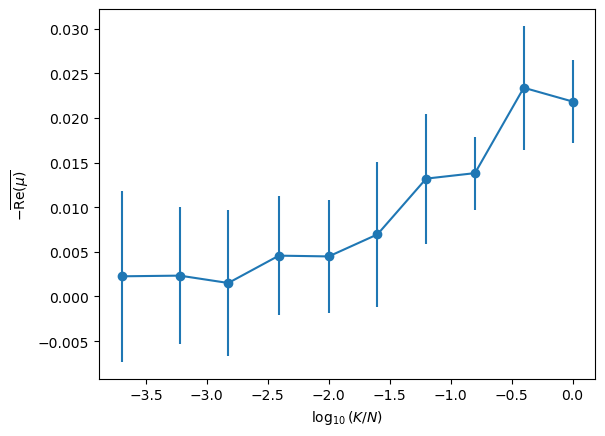

In [33]:
filebases=['data/dmd/10000/%s'%n for n in os.listdir('data/dmd/10000')]
resmin=1E-5
resmax=1E-10
rescrit=1E-7

D='5'
means=[]
stds=[]
Ks=[]
for filebase0 in filebases:
    try:
        filebase='%s/%i'%(filebase0,0)
        file=open(filebase+'.out')
        lines=file.readlines()
        N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
        N=int(N)
        K=int(K)
        file.close()
        evals1=np.load('%s/%sevals.npy'%(filebase0,D))
        res1=np.load('%s/%sres.npy'%(filebase0,D))
        inds=np.where(res1<rescrit)[0]
        xs1=np.real(np.log(evals1)/dt)
        means=means+[np.mean(xs1[inds])]
        stds=stds+[np.std(xs1[inds][np.where(xs1[inds]>0)])]
        Ks=Ks+[K]
    except:
        continue

Ks=np.array(Ks)
means=np.array(means)
stds=np.array(stds)
order=np.argsort(Ks)
plt.errorbar(np.log(Ks[order]/N)/np.log(10),-means[order],yerr=stds[order],marker='o')
plt.xlabel(r'$\log_{10}(K/N)$')
plt.ylabel(r'$-\overline{\mathrm{Re}(\mu)}$')

In [40]:
import importlib as imp
imp.reload(dmd)

<module 'dmd' from '/lustre/isaac24/proj/UTK0437/kuramoto/dmd.py'>

In [48]:
from dask import array as da

filebase0='data/dmdtest/10000/2/'
filesuffix='5'
verbose=True
load=True
M=5
D=25000
num_traj=3
X,lengths,filebase,dt=dmd.load_data(filebase0,filesuffix,verbose,num_traj,D,M,False)
Xinds=np.setdiff1d(np.arange(np.sum(lengths)),np.cumsum(lengths)-1)
Yinds=np.setdiff1d(np.arange(np.sum(lengths)),np.concatenate([[0],np.cumsum(lengths)[:-1]]))
binds=np.array([0]+list(np.cumsum(lengths)[:-1]))
if verbose:
    print('shape:', X[Xinds].shape, flush=True)

./kuramoto_64 -N 10000 -K 2 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -a 1.000000e-10 -D 1 -nvR data/dmd/10000/2/0 

runtime: 22.510843

./kuramoto_64 -N 10000 -K 2 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -a 1.000000e-10 -D 1 -nvR data/dmd/10000/2/1 

runtime: 22.076761

./kuramoto_64 -N 10000 -K 2 -c 1.750000 -t 100.000000 -d 0.010000 -s 1 -a 1.000000e-10 -D 1 -nvR data/dmd/10000/2/2 

runtime: 22.265799

data load runtime: 60.68492382578552
Filename: /lustre/isaac24/proj/UTK0437/kuramoto/dmd.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   220   1420.3 MiB   1420.3 MiB           1   @profile 
   221                                         def load_data(filebase0,filesuffix,verbose=False,num_traj=0,D=0,M=1,load=False, chunks=4096):
   222   1420.3 MiB      0.0 MiB           1       start=timeit.default_timer()
   223   1420.3 MiB      0.0 MiB           1       thetas=[]
   224   1420.3 MiB      0.0 MiB           1       lengths=[]
   225   1420.3 MiB      0.0 M

In [47]:
rank=5000
save=False
s,u,v,errs=dmd.PCA(X[Xinds],filebase,verbose,rank=rank,save=save,load=load)
r=int(errs[0][-1])
try:
    f=interp1d(errs[0],errs[1])
    r=int(root_scalar(lambda x:f(x)-pcatol,bracket=(errs[0][0],errs[0][-1])).root)
except:
    pass
if verbose:
    print('rank:',r,flush=True)
    if(r==errs[0][-1]):
        print('Warning: numerical precision may be limiting achievable pcatol')

numerical rank: 4076
Filename: /lustre/isaac24/proj/UTK0437/kuramoto/dmd.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    17   1420.3 MiB   1420.3 MiB           1   @profile
    18                                         def PCA(X,filebase,verbose=False,rank=None,load=False,save=False,chunks=4096):
    19   1420.3 MiB      0.0 MiB           1       if not load or not os.path.exists(filebase+'s.npy'):
    20                                                 start=timeit.default_timer()
    21                                                 if rank is None:
    22                                                     u,s,v=svd(X,full_matrices=False,check_finite=False)
    23                                                 else:
    24                                                     u,sda,v=da.linalg.svd_compressed(X, rank, n_oversamples=rank, compute=False)
    25                                                     stop=timeit.default_timer()
    26                  

2


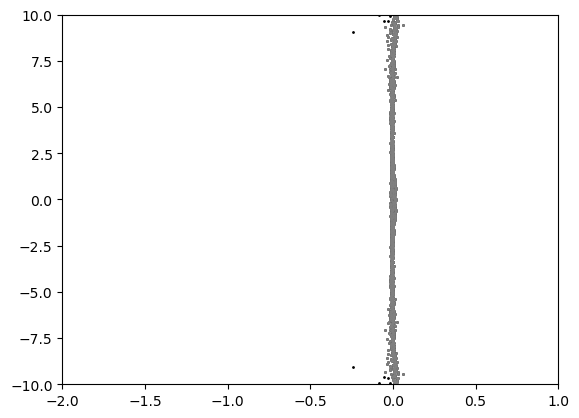

1584


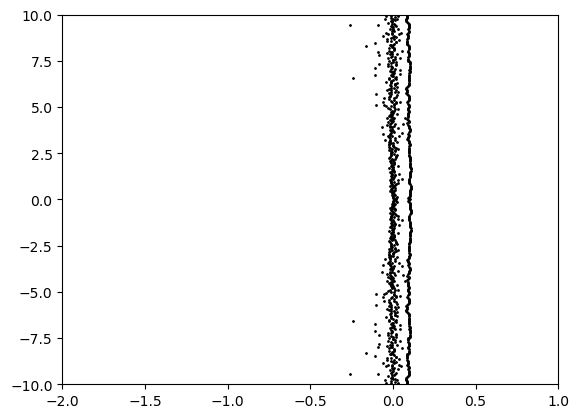

3981


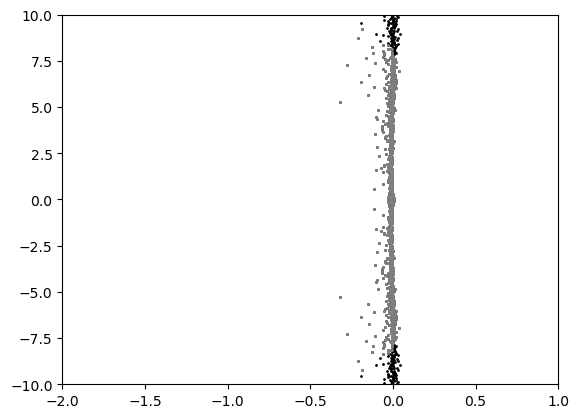

15


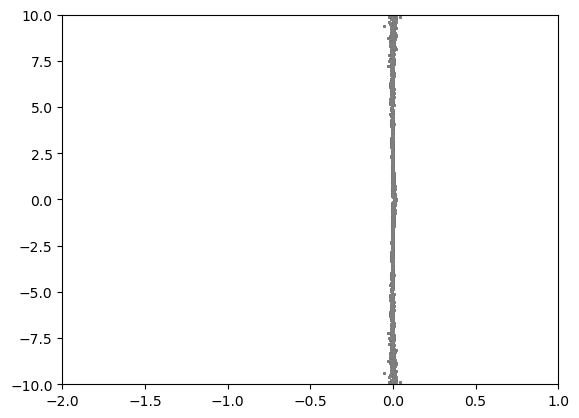

630


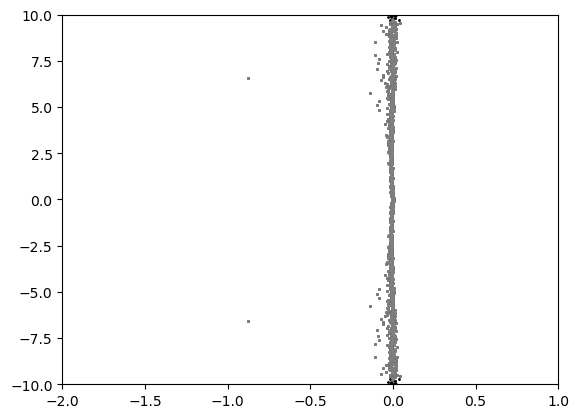

100


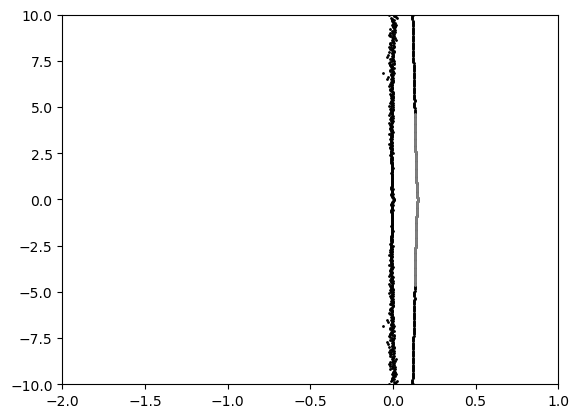

6


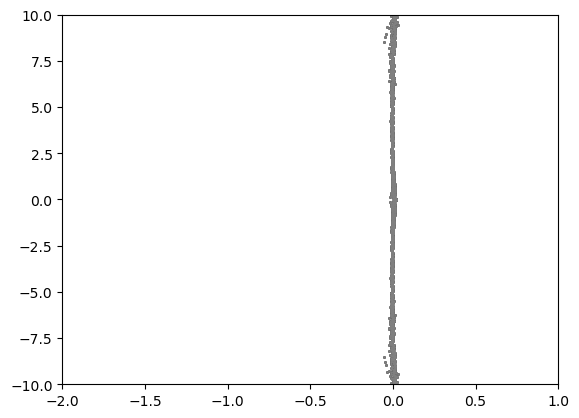

10000


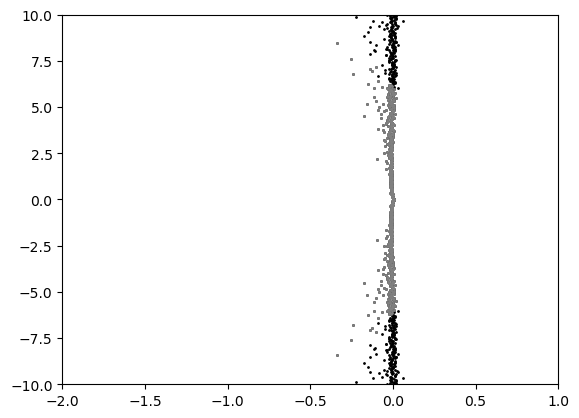

39


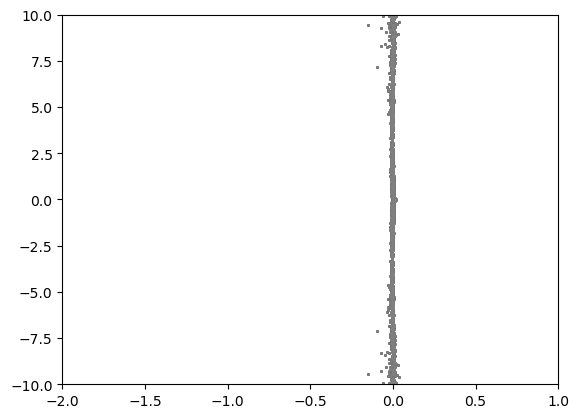

In [20]:
rescrit=1E-7
for filebase0 in filebases:
    try:
        filebase='%s/%i'%(filebase0,0)
        file=open(filebase+'.out')
        lines=file.readlines()
        N,K,t1,dt,c,seed=np.array(lines[0].split(),dtype=np.float64)
        N=int(N)
        K=int(K)
        file.close()
        evals1=np.load('%s/%sevals.npy'%(filebase0,D))
        res1=np.load('%s/%sres.npy'%(filebase0,D))
        inds=np.where(res1<rescrit)[0]
        xs1=np.real(np.log(evals1)/dt)
        ys1=np.imag(np.log(evals1)/dt)
        
        inds=np.where(res1<rescrit)[0]
        print(K)
        plt.scatter(xs1,ys1,c='black',s=1,zorder=-5)
        plt.scatter(xs1[inds],ys1[inds],c='gray',s=1,zorder=-5)
        plt.ylim(-10,10)
        plt.xlim(-2,1)
        plt.show()
    except:
        continue

In [20]:
rescrit=1E-7
for filebase0 in filebases:
    # for D in ['1','2','3','4','5']:
    for D in ['1','2','3','4']:
        evals=np.load(filebase0+str(D)+'evals.npy')
        res=np.load(filebase0+str(D)+'res.npy')
        inds=np.where(res<rescrit)[0]
        xs=np.real(np.log(evals[inds])/dt)
        print(np.min(xs))

-0.05399192534367124
-0.12379785966793806
-0.0773493847915627
-0.17859205121806185
-0.029241009831483977
-0.07978425629004511
-0.06451910708312107
-0.06551454829991382
-0.37093769488330464
-0.28320259880426524
-0.3361545402408561
-0.5232174818671379


<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4174519/1053792533.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$-log(Re(\mu_i)/Re(\mu_{i_0}))$')


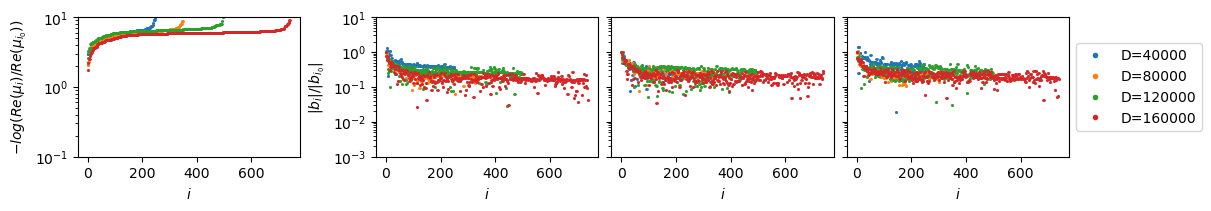

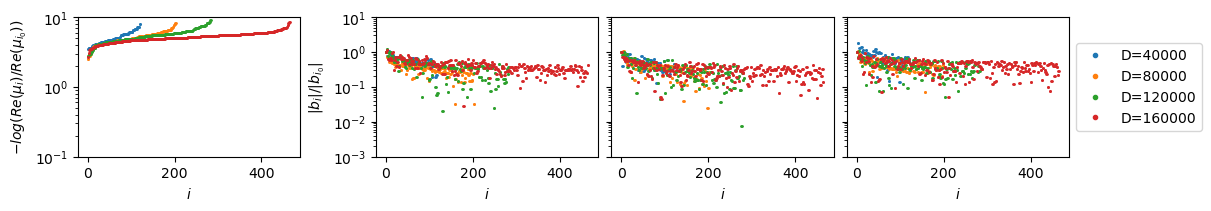

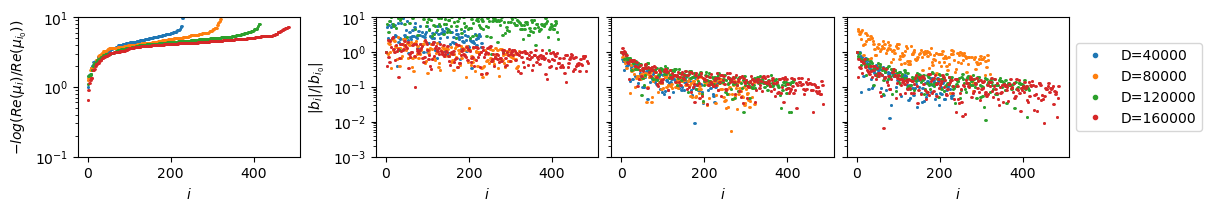

In [21]:
for filebase0 in filebases:
    resmin=1E-5
    resmax=1E-10
    rescrit=1E-7
    plt.subplots(1,4,figsize=(12,2),layout='constrained')

    # for D in ['1','2','3','4','5']:
    for D in ['1','2','3','4']:
        M=int(D[0])
        bs=np.load(filebase0+str(D)+'bs.npy')
        evals=np.load(filebase0+str(D)+'evals.npy')
        res=np.load(filebase0+str(D)+'res.npy')
        inds=np.where(res<rescrit)[0]
        xs=np.real(np.log(evals[inds])/dt)

        plt.subplot(1,4,1)
        sinds=np.intersect1d(np.where(-np.sort(xs)<3)[0],np.where(np.sort(xs)<0)[0])
        vals=xs[np.argsort(xs)][sinds]
        plt.plot(-np.log(np.abs(vals)),marker='o',lw=0,ms=1)
        plt.yscale('log')
        plt.ylabel('$-log(Re(\mu_i)/Re(\mu_{i_0}))$')
        plt.xlabel('$i$')
        plt.ylim(1E-1,1E1)


        plt.subplot(1,4,2)
        vals=np.abs(bs[0])[inds][np.argsort(xs)][sinds]
        plt.plot(vals/vals[0],marker='o',lw=0,ms=1,label='D=%i'%(N*2*M+N/2*4*M))
        plt.yscale('log')
        plt.ylabel('$|b_i|/|b_{i_0}|$')
        plt.xlabel('$i$')
        plt.ylim(1E-3,1E1)

        plt.subplot(1,4,3)
        vals=np.abs(bs[1])[inds][np.argsort(xs)][sinds]
        plt.plot(vals/vals[0],marker='o',lw=0,ms=1,label='D=%i'%(N*2*M+N/2*4*M))
        plt.yscale('log')
        plt.xlabel('$i$')
        plt.ylim(1E-3,1E1)
        plt.gca().set_yticklabels('')

        plt.subplot(1,4,4)
        vals=np.abs(bs[2])[inds][np.argsort(xs)][sinds]
        plt.plot(vals/vals[0],marker='o',lw=0,ms=1,label='D=%i'%(N*2*M+N/2*4*M))
        plt.yscale('log')
        plt.xlabel('$i$')
        plt.ylim(1E-3,1E1)
        plt.gca().set_yticklabels('')
    plt.gca().legend(loc='center left', markerscale=3, bbox_to_anchor=(1, 0.5))
    plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4174519/2646902699.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$-log(Re(\mu_i)/Re(\mu_{i_0}))$')


omegamin -0.04958865321819278
omegamin -0.12379785966793806
omegamin -0.06451910708312107
omegamin -0.17859205121806185


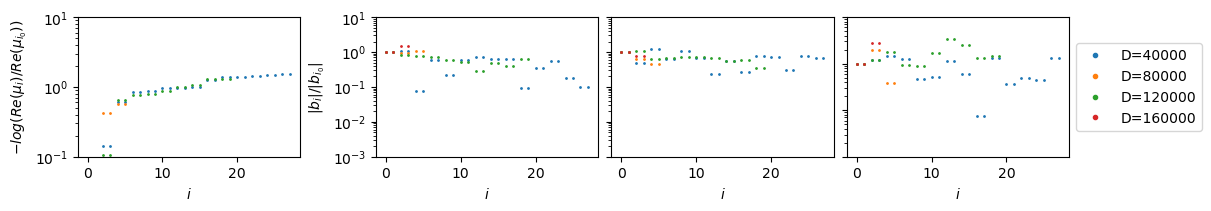

In [23]:
resmin=1E-5
resmax=1E-10
rescrit=5E-8
plt.subplots(1,4,figsize=(12,2),layout='constrained')

# for D in ['1','2','3','4','5']:
for D in ['1','2','3','4']:
    omegamin=0
    for filebase0 in filebases[:-1]:
        M=int(D[0])
        bs=np.load(filebase0+str(D)+'bs.npy')
        evals=np.load(filebase0+str(D)+'evals.npy')
        res=np.load(filebase0+str(D)+'res.npy')
        inds=np.where(res<rescrit)[0]
        xs=np.real(np.log(evals[inds])/dt)
        omegamin=np.min([omegamin,np.min(xs)])
    print('omegamin',omegamin)

    filebase0=filebases[-1]
    M=int(D[0])
    bs=np.load(filebase0+str(D)+'bs.npy')
    evals=np.load(filebase0+str(D)+'evals.npy')
    res=np.load(filebase0+str(D)+'res.npy')
    inds=np.where(res<rescrit)[0]
    xs=np.real(np.log(evals[inds])/dt)

    plt.subplot(1,4,1)
    sinds=np.intersect1d(np.where(-np.sort(xs)<3)[0],np.where(np.sort(xs)<omegamin)[0])
    vals=xs[np.argsort(xs)][sinds]
    plt.plot(-np.log(vals/vals[0]),marker='o',lw=0,ms=1)
    plt.yscale('log')
    plt.ylabel('$-log(Re(\mu_i)/Re(\mu_{i_0}))$')
    plt.xlabel('$i$')
    plt.ylim(1E-1,1E1)


    plt.subplot(1,4,2)
    vals=np.abs(bs[2])[inds][np.argsort(xs)][sinds]
    plt.plot(vals/vals[0],marker='o',lw=0,ms=1,label='D=%i'%(N*2*M+N/2*4*M))
    plt.yscale('log')
    plt.ylabel('$|b_i|/|b_{i_0}|$')
    plt.xlabel('$i$')
    plt.ylim(1E-3,1E1)

    plt.subplot(1,4,3)
    vals=np.abs(bs[1])[inds][np.argsort(xs)][sinds]
    plt.plot(vals/vals[0],marker='o',lw=0,ms=1,label='D=%i'%(N*2*M+N/2*4*M))
    plt.yscale('log')
    plt.xlabel('$i$')
    plt.ylim(1E-3,1E1)
    plt.gca().set_yticklabels('')

    plt.subplot(1,4,4)
    vals=np.abs(bs[0])[inds][np.argsort(xs)][sinds]
    plt.plot(vals/vals[0],marker='o',lw=0,ms=1,label='D=%i'%(N*2*M+N/2*4*M))
    plt.yscale('log')
    plt.xlabel('$i$')
    plt.ylim(1E-2,1E1)
    plt.gca().set_yticklabels('')
plt.gca().legend(loc='center left', markerscale=3, bbox_to_anchor=(1, 0.5))
plt.show()